In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [30]:
df = pd.DataFrame(data={
    'valence': [0.28, 0.39, 0.38, 0.46],
    'energy': [0.37, 0.50, 0.37, 0.54],
    'tension': [0.40, 0.46, 0.50, 0.56],
    'anger': [0.28, 0.23, 0.15, 0.22],
    'fear': [0.41, 0.27, 0.18, 0.28],
    'happy': [0.17, 0.21, 0.17, 0.17],
    'sad': [0.20, 0.23, 0.27, 0.28],
    'tender': [0.18, 0.23, 0.10, 0.10]
    }#, 
    # columns={'predicted': ['153', '322'], 'annotated': ['153', '322']})
    #columns = ['predicted#153', 'annotated#322', 'predicted#153', 'annotated#322']
).transpose()

df.columns = ['predicted#153', 'predicted#322', 'annotated#153', 'annotated#322']

df['emotion'] = df.index
df

,predicted#153,predicted#322,annotated#153,annotated#322,emotion
valence,0.28,0.39,0.38,0.46,valence
energy,0.37,0.50,0.37,0.54,energy
tension,0.40,0.46,0.50,0.56,tension
anger,0.28,0.23,0.15,0.22,anger
fear,0.41,0.27,0.18,0.28,fear
happy,0.17,0.21,0.17,0.17,happy
sad,0.20,0.23,0.27,0.28,sad
tender,0.18,0.23,0.10,0.10,tender


In [108]:
df_melt = df.melt(id_vars = 'emotion')
df_melt['category'] = [row.split('#')[0] for row in df_melt['variable']]
df_melt['song'] = [row.split('#')[1] for row in df_melt['variable']]
df_melt = df_melt.sort_values(by=['song', 'category'])


df_melt['category_song'] = "#" + df_melt['song'] + ": " + df_melt['category']

df_melt.head()

,emotion,variable,value,category,song,category_song
16,valence,annotated#153,0.38,annotated,153,#153: annotated
17,energy,annotated#153,0.37,annotated,153,#153: annotated
18,tension,annotated#153,0.50,annotated,153,#153: annotated
19,anger,annotated#153,0.15,annotated,153,#153: annotated
20,fear,annotated#153,0.18,annotated,153,#153: annotated


/tmp/ipykernel_1640511/2352670433.py:2: UserWarning: 
The markers list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(df_melt,


Text(0, 0.5, 'Predicted/Annotated Emotion Rating')

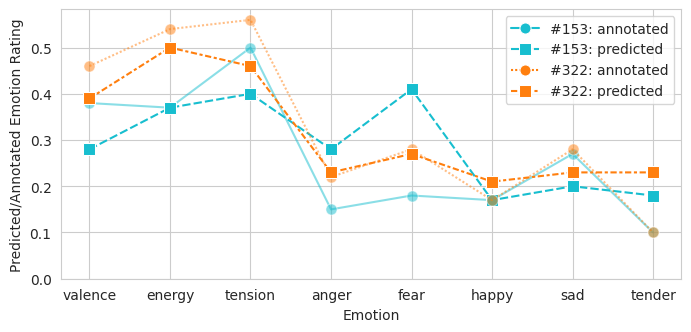

In [114]:
fig, ax = plt.subplots(figsize=(8, 3.5))
sns.lineplot(df_melt, 
             x='emotion', 
             y='value', 
             hue='category_song',
             palette=['tab:cyan', 'tab:cyan', 'tab:orange', 'tab:orange'],
             style='category_song', 
             markers=['o', 's'], 
             markersize=8,
             ax=ax
            )

ax.get_lines()[0].set_alpha(0.5)
ax.get_lines()[2].set_alpha(0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles[0:], labels=labels[0:])

# Set y-axis to start at 0
plt.ylim(bottom=0)

# Add axis labels
plt.xlabel('Emotion')
plt.ylabel('Predicted/Annotated Emotion Rating')
